https://github.com/rlabbe/filterpy

In [1]:
import numpy as np
from filterpy.kalman import KalmanFilter
from filterpy.common import Q_discrete_white_noise
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
my_filter = KalmanFilter(dim_x=2, dim_z=1)

In [3]:
dt=1.0
my_filter.x = np.array([[2.],
                [0.]])       # initial state (location and velocity)

my_filter.F = np.array([[1.,1.],
                [0.,1.]])    # state transition matrix

my_filter.H = np.array([[1.,0.]])    # Measurement function
my_filter.P *= 1000.                 # covariance matrix
my_filter.R = 5                      # state uncertainty
my_filter.Q = Q_discrete_white_noise(2, dt, .1) # process uncertainty

In [4]:
def get_some_measurement(i):
    return np.sin(i/(2*np.pi)) + 0.5*np.random.random()

get_some_measurement(50)

1.0965006564657107

In [5]:
measurement = []
filter_result = []

for i in range(100):
    my_filter.predict()
    measurement.append(get_some_measurement(i))
    my_filter.update(measurement[i])

    # do something with the output
    x = my_filter.x[0][0]
    filter_result.append(x)

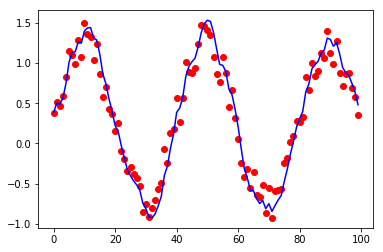

In [6]:
plt.plot(measurement, 'ro')
plt.plot(filter_result, 'b');